# IAB303 - Assessment Task 2
## TOWS analysis report

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. Choose to use either the supplied scenario OR your own scenario. If selecting your own, check suitability with teaching team. If using the supplied scenario, use the provided internal data. You may supplement this with additional data as required.
3. Ensure that you include at least 1 complete analysis using *internal* data
4. Ensure that you include at least 1 complete analysis using *external* data
5. Ensure that you include at least 1 actionable recommendation from a TOWS analysis using your data analytics from steps 3 & 4.
6. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the business concern.
7. Ensure that you undertakee a peer review process and complete the peer review section
6. Before handing in your notebook, clear all cell outputs and run the complete notebook. Ensure that it runs without errors and that all output is displaying
7. Right-click on your notebook name (in file viewer) and select download. Ensure that your name and student ID are on the file, and then upload to the appropriate assignment upload link in blackboard.

In [1]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.core.display import display, HTML

first_name = "Cai"
last_name = "Liosatos"
student_number = "n10514295"

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

C:\Users\Cai Liosatos\AppData\Local\Temp\ipykernel_16168\647116755.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---

## SCENARIO

### Use the scenario below, OR write a description of your own scenario: 

You are working as a business analytics consultant for a non-profit organisation that offers residential aged care in Brisbane. The organisation has recently received philanthropic funding to help enance community understanding of the needs of the sector,  improve government action, and improve their influence within the sector.
Before taking action and spending the money, they would like to have a better understanding of strengths and weaknesses in their service area through an analysis of relevant service providers. They have provided you with a report on [Service Places from 2021](https://www.gen-agedcaredata.gov.au/Resources/Access-data/2022/April/GEN-data-Providers,-services-and-places-in-aged-ca) for this purpose. They would also like to know about possible opportunity and threats which may impact the objective. They have suggested using data on [what Australian's think of aged care](https://data.gov.au/dataset/ds-dga-2eae3889-8a5e-413a-9496-5fd80f7ae370/details?q=aged%20care), supplemented by an analysis of relevant Australian headlines from [the Guardian](https://www.theguardian.com/au) online news.



For the purposes of this exercise, you can make up other aspects of the scenario which may be important to your anlaysis (e.g. location, business details), and you may choose to use other sources of data if they are helpful.

---


### [1] Business Concern

*## Expand on your interpretation of your chosen scenario here, and be clear in identifying the business concern that the analysis will address. ##*


enhance community understanding of the needs of the sector,  <br />
improve government action, <br />
improve their influence within the sector<br />

strengths and weaknesses in their service area through an analysis of relevant service providers<br />
opportunity and threats which may impact the objective

external:
- covid
- death
- increasing prices
- accessibility
- staffing
- legislation/laws
- mandatory cultural/religious changes/assistance 

internal:
- number of diff org types per state
- remoteness
- operational places
- look at ACPR name, potentially look at total count/operational place for all of sydney, bris.....
- accessibility

In [2]:
# import libraries needed for this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import urllib.request
import json
import os

cache_on = True

### Services places:


- ACPR code - code for 'place'
- MMM code - 'remoteness' code for remoteness column, not 1:1
- service size, need to iterate to make it readable, (just 1-20, 21-40, 41-60, 61-80, 81-100, 101+)
- operational places - # of places

### survey:


weight: population weight expressed as thousands of people in the Australian population aged 18 years
or more (i.e. a value of 3 is 3,000 people).

SCR1 Do you agree to participate in the survey?<br />
SINGLE RESPONSE<br />
1. Yes
2. No

SCR3 Do you currently live in<br />
SINGLE RESPONSE<br />
READ OUT<br />
1. Residential aged care or a nursing home
2. A place you own
3. A place you rent
4. Somewhere else

HQGender: “allocated gender” for weighting from SCR4<br />
1. 1 Male
2. 2 Female

Hqareatypex: ARIA derived from SCR5<br />
1. Metro
2. Regional
3. Remote

age bracket (scr7)<br />
SCR7 To which of the following age groups do you belong?<br />
SINGLE RESPONSE<br />
READ OUT LIST<br />
1. Under 18
2. 18-24
3. 25-34
4. 35-44
5. 45-54
6. 55-64
7. 65-69
8. 70-79
9. 80-89
10. 90 or older
99. Prefer not to say

house income (scr9)<br />
SCR9 I will read a list of income ranges, please tell me which one is the best estimate of your TOTAL<br />
approximate annual income from all sources, before tax.<br />
SINGLE RESPONSE<br />
DO NOT READ PER WEEK UNLESS NEEDED<br />
$1 to $9,999 per year ($1 - $189 per week) **1**<br />
$10,000 - $19,999 per year ($190 - $379 per week) **2**<br />
$20,000 - $29,999 per year ($380 - $579 per week) **3**<br />
$30,000 - $39,999 per year ($580 - $769 per week) **4**<br />
$40,000 - $49,999 per year ($770 - $959 per week) **5**<br />
$50,000 - $59,999 per year ($960 - $1149 per week) **6**<br />
$60,000 - $79,999 per year ($1150 - $1529 per week) **7**<br />
$80,000 - $99,999 per year ($1530 - $1919 per week) **8**<br />
$100,000 - $124,999 per year ($1920 - $2399 per week) **9**<br />
$125,000 - $149,999 per year ($2400 - $2879 per week) **10**<br />
$150,000 - $199,999 per year ($2880 - $3839 per week) **11**<br />
$200,000 or more per year ($3840 or more per week) **12**<br />
DON’T KNOW **98**<br />
REFUSED **99**<br />

q36/40: if 36/40 = 1, then number in 36/40_other, elif 99, then user does not know/refuses and nothing in other


### [2] Analysis of External Data - Opportunities and Threats

*## Include a full QDAVI cycle for your analysis. You must do at least one complete analysis on external data. Ensure that you document what you are doing and why you are doing it ##*

### Question:

### Data:

#### functions to create required data

##### functions for caching API search results for local use

In [3]:
# function to create a cached file containing the page pulled from the API
def cache_save(folder_url, current_page, cache_list):
    np.save(folder_url+str(current_page)+".npy", cache_list, allow_pickle=True, fix_imports=True)

# function to load the cached files into a list
def cache_load(folder_url):
# loading cache
    if os.path.exists(folder_url):
        loaded_cache = []
        for file in os.listdir(folder_url):
            loaded_cache.append(np.load(folder_url+file, allow_pickle=True).tolist())
        new_cache_list = flatten_list(loaded_cache)
        return new_cache_list

# function to flatten list of cached lists into a singular list
def flatten_list(cache_list):
    flat_list = []
    # Iterate through the outer list
    for element in cache_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

##### functions for calling to TheGuardian API, and cleaning the DF

In [4]:
# calling the api URL to get the total page count
def page_count(api_url_start, api_url_end):
    error_counter = 0
    while error_counter < 3:
        api_url = api_url_start + "1" + api_url_end
        content = requests.get(api_url)
        api_data = json.loads(content.content)
        if api_data['response']['status'] == "ok":
            page_count = int(api_data['response']['pages'])
            break
        else:
            error_counter += 1
    page_count = "API has errored three times in a row whilst trying to get page count, check if the URL is correct" if error_counter >= 3 else page_count
    return page_count

#  function to scrape the data from the page returned from the api into a list
def api_scraping(page_count, url_start, url_end, folder_url):
    error_msg = []
    error_counter = 0
    current_page = 1
    results_list = []
# while loop to add outputs to a list
    while current_page <= page_count:
        if error_counter < 3:
            cache_list = []
            api_url = url_start + str(current_page) + url_end
            content = requests.get(api_url)
            api_data = json.loads(content.content)
            if api_data['response']['status'] == "error":
                error_msg.append(api_data['response']['message'])
                error_counter += 1
            else:
                for item in api_data['response']['results']:
                    cache_list.append(item)
                    results_list.append(item)
        
                # caching results for local use
                if cache_on:
                    cache_save(folder_url, current_page, cache_list)
                current_page += 1
                error_counter = 0
                error_msg = []
        else:
            error_msg.append("API has errored three times in a row, giving up")
            break
    return results_list, error_msg

# Clean up dataframe to be more visually appealing, and easier to use
def df_creation(dataframe_name):
    dataframe_name = dataframe_name.rename(columns = {'id':'ID', 'type':'Type', 'sectionId':'SectionID', 'sectionName':'Section Name', 'webPublicationDate':'Web Publication Date', 'webTitle':'Web Title', 'webUrl':'URL', 'apiUrl':'API URL', 'isHosted':'Is Hosted', 'pillarId': 'Pillar ID', 'pillarName':'Pillar Name'}).copy()
    # clean the data to be more user friendly
    if "Web Publication Date" in dataframe_name.columns:
        dataframe_name["Web Publication Date"] = dataframe_name["Web Publication Date"].apply(lambda x: x.replace("T", " ").replace("Z", ""))
        if dataframe_name["Web Publication Date"].dtype == object:
            dataframe_name["Web Publication Date"] = pd.to_datetime(dataframe_name["Web Publication Date"], format="%Y-%m-%d %H:%M:%S")
        dataframe_name.sort_values(by='Web Publication Date', ascending=False, inplace=True)
        dataframe_name["Month"] = dataframe_name["Web Publication Date"].dt.month
        dataframe_name["Year"] = dataframe_name["Web Publication Date"].dt.year
    if "Pillar ID" in dataframe_name.columns:
        dataframe_name["Pillar ID"] = dataframe_name["Pillar ID"].astype(str).apply(lambda x: x.replace("pillar/", ""))
    
    return dataframe_name

##### functions for HTML, and cleaning the constructed DF

In [5]:
def df_cleaning(df):
    df["Date"] = df["Date"].apply(lambda x: x.replace("T", " ").replace("Z", ""))
    if df["Date"].dtype == object:
        df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d %H:%M:%S")
    df.sort_values(by='Date', ascending=False, inplace=True)
    
    if "Month" not in df.columns:
        df["Month"] = df["Date"].dt.month
    if "Year" not in df.columns:
        df["Year"] = df["Date"].dt.year
    return df

# Get HTML function
def get_HTML(url):
    response = requests.get(url)
    html = response.text
    return html

# Beautiful soup function for subtitle
def extract_subTitle(HTML):
    soup = BeautifulSoup(HTML, "html.parser") # the html input and the parser name
    article = soup.find("main") # the tag that contains the article
    div_element = article.find("div", attrs={"data-gu-name": "standfirst"}) # the tag that can be found using an attribute
    target_element = div_element.find("p")
    if target_element:
        return target_element.text
    else:
        return '-'

# Beautiful soup function for live articles
def parse_article(article, temp_result):
    fig_element = article.find("figure")
    if fig_element:
        temp_result = ''
    else:
        for child in article.children:   
            if child.name == 'p':
                temp_result += child.text + '\n'
            if child.name == 'ul':
                for li in child.findAll('li'):
                    if li.find('ul'):
                        break
                    temp_result += li.text + '\n'
        temp_result += '\n'
    return temp_result

# Beautiful soup function for body
def extract_body(HTML):
    result = ""
    soup = BeautifulSoup(HTML, "html.parser") # the html input and the parser name

    news = soup.find("main", attrs={"data-layout": "LiveLayout"})
    if news:
        div_element = news.find("div", attrs={"id": "liveblog-body"}) # the tag that can be found using an attribute
        div_art_element = div_element.findAll("article")
        for item in div_art_element:
            temp_result = ''
            temp_result = parse_article(item, temp_result)
            result += temp_result
    else:
        news = soup.find("main") # the tag that contains the article
        div_element = news.find("div", attrs={"id": "maincontent"}) # the tag that can be found using an attribute
        div_div_element = div_element.find("div")
        target_elements = div_element.findAll("p")
        for te in target_elements:
            result += te.text + '\n'*2
            
    return result

def scraping_df(results):
    results_data_list = []

    for news in results:
        html = get_HTML(news["webUrl"])
        dynamic_map = {}
        dynamic_map["Date"] = news["webPublicationDate"]
        dynamic_map["Section"] = news["sectionName"]
        dynamic_map["Title"] = news["webTitle"]
        dynamic_map["Subtitle"] = extract_subTitle(html)
        dynamic_map["Body"] = extract_body(html)

        results_data_list.append(dynamic_map)
        
    scraped_data_df = df_cleaning(pd.DataFrame(results_data_list))
    
    return scraped_data_df

#### code using said functions

##### pulling results from TheGuardian api from 2017 onwards under the search condition of "Aged care facility"

In [6]:
# setting important variables
aged_care_results = []
aged_care_api_url_start = "https://content.guardianapis.com/search?from-date=2017-01-01&order-by=newest&page="
aged_care_api_url_end = "&page-size=50&q=%22Aged%20care%20facility%22&api-key=dd3e21c9-be37-4bdb-b311-2fd86c0fd153"

# getting the total page count
aged_care_page_count = page_count(aged_care_api_url_start, aged_care_api_url_end)
# making the cache folder directory
if cache_on:
    if os.path.exists("./cache/Aged-Care-Facility/") is False:
        os.makedirs("./cache/Aged-Care-Facility/")

# printing first result of data if no errors, else printing the error (formatted)
if type(aged_care_page_count) == int:
    aged_care_results, error_msg = api_scraping(aged_care_page_count, aged_care_api_url_start, aged_care_api_url_end, "./cache/Aged-Care-Facility/")
    print(f"{error_msg[3]}\n\nThese were the error messages:\n1: {error_msg[0]}\n2: {error_msg[1]}\n3: {error_msg[2]}\n\nMake sure the URL is correct, then try again") if len(error_msg) > 3 else print(aged_care_results[0])
else:
    print(aged_care_page_count)



# 'https://content.guardianapis.com/search?from-date=2017-01-01&order-by=newest&page=1&page-size=50&q=%22Aged%20care%20facility%22&api-key=dd3e21c9-be37-4bdb-b311-2fd86c0fd153'

{'id': 'australia-news/live/2022/sep/28/australia-politics-live-anti-corruption-bill-mark-dreyfus-petrol-excise-tax-anthony-albanese-optus-data-hack-cyber-security', 'type': 'liveblog', 'sectionId': 'australia-news', 'sectionName': 'Australia news', 'webPublicationDate': '2022-09-28T08:54:58Z', 'webTitle': 'Labor MP says Coalition partly to blame for telco hack – as it happened', 'webUrl': 'https://www.theguardian.com/australia-news/live/2022/sep/28/australia-politics-live-anti-corruption-bill-mark-dreyfus-petrol-excise-tax-anthony-albanese-optus-data-hack-cyber-security', 'apiUrl': 'https://content.guardianapis.com/australia-news/live/2022/sep/28/australia-politics-live-anti-corruption-bill-mark-dreyfus-petrol-excise-tax-anthony-albanese-optus-data-hack-cyber-security', 'isHosted': False, 'pillarId': 'pillar/news', 'pillarName': 'News'}


In [7]:
# loading cache
if cache_on:
    aged_care_results = cache_load("./cache/Aged-Care-Facility/")

In [8]:
ac_df = df_creation(pd.DataFrame(aged_care_results))
ac_df

,ID,Type,SectionID,Section Name,Web Publication Date,Web Title,URL,API URL,Is Hosted,Pillar ID,Pillar Name,Month,Year
0,australia-news/live/2022/sep/28/australia-poli...,liveblog,australia-news,Australia news,2022-09-28 08:54:58,Labor MP says Coalition partly to blame for te...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,news,News,9,2022
1,australia-news/live/2022/sep/17/australia-news...,liveblog,australia-news,Australia news,2022-09-17 07:58:57,Government tries to block rail union action; P...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,news,News,9,2022
2,australia-news/2022/sep/13/as-covid-crippled-a...,article,australia-news,Australia news,2022-09-12 17:30:42,As Covid crippled aged care sector only 30 ADF...,https://www.theguardian.com/australia-news/202...,https://content.guardianapis.com/australia-new...,False,news,News,9,2022
3,australia-news/live/2022/sep/03/qantas-boss-wa...,liveblog,australia-news,Australia news,2022-09-03 08:00:22,More than 30 people died due to triple-zero de...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,news,News,9,2022
4,australia-news/2022/aug/08/plans-for-retiremen...,article,australia-news,Australia news,2022-08-07 17:30:04,Plans for retirement village in Brisbane area ...,https://www.theguardian.com/australia-news/202...,https://content.guardianapis.com/australia-new...,False,news,News,8,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,australia-news/2017/oct/17/the-artists-paintin...,article,australia-news,Australia news,2017-10-16 17:00:05,The artists painting their Indigenous songline...,https://www.theguardian.com/australia-news/201...,https://content.guardianapis.com/australia-new...,False,news,News,10,2017
421,australia-news/2017/aug/23/the-answers-in-the-...,article,australia-news,Australia news,2017-09-07 09:45:17,Australian marriage equality vote explainer – ...,https://www.theguardian.com/australia-news/201...,https://content.guardianapis.com/australia-new...,False,news,News,9,2017
422,commentisfree/2017/aug/17/religious-freedom-is...,article,commentisfree,Opinion,2017-08-17 01:36:06,Religious freedom is an important right. Once ...,https://www.theguardian.com/commentisfree/2017...,https://content.guardianapis.com/commentisfree...,False,opinion,Opinion,8,2017
423,society/2017/apr/11/qanda-81-year-old-calls-eu...,article,society,Society,2017-04-10 21:06:41,Q&A: 81-year-old audience member calls euthana...,https://www.theguardian.com/society/2017/apr/1...,https://content.guardianapis.com/society/2017/...,False,news,News,4,2017


##### pulling results from TheGuardian api from 2017 onwards under the search condition of "residential aged care"

In [9]:
#
# setting important variables
residential_care_results = []
residential_care_api_url_start = "https://content.guardianapis.com/search?from-date=2017-01-01&order-by=newest&page="
residential_care_api_url_end = "&page-size=50&q=%22Residential%20Aged%20Care%22&api-key=dd3e21c9-be37-4bdb-b311-2fd86c0fd153"

# getting the total page count
residential_care_page_count = page_count(residential_care_api_url_start, residential_care_api_url_end)

# making the cache folder directory
if cache_on:
    if os.path.exists("./cache/Aged-Care-Facility/") is False:
        os.makedirs("./cache/Residential-Aged-Care/")

# printing first result of data if no errors, else printing the error (formatted)
if type(residential_care_page_count) == int:
    residential_care_results, error_msg = api_scraping(residential_care_page_count, residential_care_api_url_start, residential_care_api_url_end, "./cache/Residential-Aged-Care/")
    print(f"{error_msg[3]}\n\nThese were the error messages:\n1: {error_msg[0]}\n2: {error_msg[1]}\n3: {error_msg[2]}\n\nMake sure the URL is correct, then try again") if len(error_msg) > 3 else print(residential_care_results[0])
else:
    print(residential_care_page_count)


# 'https://content.guardianapis.com/search?from-date=2017-01-01&order-by=newest&page=1&page-size=50&q=%22Residential%20Aged%20Care%22&api-key=dd3e21c9-be37-4bdb-b311-2fd86c0fd153'

{'id': 'australia-news/2022/sep/24/grim-milestone-as-australias-aged-care-homes-mark-4000-covid-deaths', 'type': 'article', 'sectionId': 'australia-news', 'sectionName': 'Australia news', 'webPublicationDate': '2022-09-24T00:30:49Z', 'webTitle': 'Grim milestone as Australia’s aged care homes mark 4,000 Covid deaths ', 'webUrl': 'https://www.theguardian.com/australia-news/2022/sep/24/grim-milestone-as-australias-aged-care-homes-mark-4000-covid-deaths', 'apiUrl': 'https://content.guardianapis.com/australia-news/2022/sep/24/grim-milestone-as-australias-aged-care-homes-mark-4000-covid-deaths', 'isHosted': False, 'pillarId': 'pillar/news', 'pillarName': 'News'}


In [10]:
# loading cache
if cache_on:
    residential_care_results = cache_load("./cache/Residential-Aged-Care/")

In [11]:
rc_df = df_creation(pd.DataFrame(residential_care_results))
rc_df

,ID,Type,SectionID,Section Name,Web Publication Date,Web Title,URL,API URL,Is Hosted,Pillar ID,Pillar Name,Month,Year
0,australia-news/2022/sep/24/grim-milestone-as-a...,article,australia-news,Australia news,2022-09-24 00:30:49,Grim milestone as Australia’s aged care homes ...,https://www.theguardian.com/australia-news/202...,https://content.guardianapis.com/australia-new...,False,news,News,9,2022
1,australia-news/2022/sep/20/australian-governme...,article,australia-news,Australia news,2022-09-19 17:30:06,Australian government faces biggest class acti...,https://www.theguardian.com/australia-news/202...,https://content.guardianapis.com/australia-new...,False,news,News,9,2022
2,australia-news/live/2022/sep/17/australia-news...,liveblog,australia-news,Australia news,2022-09-17 07:58:57,Government tries to block rail union action; P...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,news,News,9,2022
3,commentisfree/2022/sep/15/australians-might-be...,article,commentisfree,Opinion,2022-09-15 02:15:18,Australians might be ‘living with Covid’ but a...,https://www.theguardian.com/commentisfree/2022...,https://content.guardianapis.com/commentisfree...,False,opinion,Opinion,9,2022
4,australia-news/live/2022/sep/13/australia-news...,liveblog,australia-news,Australia news,2022-09-13 08:54:58,Mixed reaction on potential delay to integrity...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,news,News,9,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,australia-news/live/2017/aug/08/coalition-join...,liveblog,australia-news,Australia news,2017-08-08 08:14:56,Malcolm Roberts under pressure on citizenship ...,https://www.theguardian.com/australia-news/liv...,https://content.guardianapis.com/australia-new...,False,news,News,8,2017
387,sustainable-business/2017/jun/28/always-grasp-...,article,sustainable-business,Guardian Sustainable Business,2017-06-28 02:37:19,'Always grasp the opportunity': confronting ag...,https://www.theguardian.com/sustainable-busine...,https://content.guardianapis.com/sustainable-b...,False,nan,NaN,6,2017
388,world/2017/jun/20/tuesday-briefing-deadly-real...,article,world,World news,2017-06-20 05:25:47,Tuesday briefing: Deadly reality of Islamophob...,https://www.theguardian.com/world/2017/jun/20/...,https://content.guardianapis.com/world/2017/ju...,False,news,News,6,2017
389,world/2017/mar/25/the-coming-back-out-ball-how...,article,world,World news,2017-03-24 21:36:50,The Coming Back Out Ball: being out and proud ...,https://www.theguardian.com/world/2017/mar/25/...,https://content.guardianapis.com/world/2017/ma...,False,news,News,3,2017


##### using web scraping to retrieve certain aspects of the acquired theguardian articles

In [12]:
# Populate the dataframe
ac_scraped_data_df = scraping_df(aged_care_results)
ac_scraped_data_df

,Date,Section,Title,Subtitle,Body,Month,Year
0,2022-09-28 08:54:58,Australia news,Labor MP says Coalition partly to blame for te...,Federal government believes the company should...,Anthony Albanese then takes a dixer on the Opt...,9,2022
1,2022-09-17 07:58:57,Australia news,Government tries to block rail union action; P...,Flood warnings in place for parts of Australia...,And that’s where we’ll leave you this evening....,9,2022
2,2022-09-12 17:30:42,Australia news,As Covid crippled aged care sector only 30 ADF...,"As death toll in aged care facilities hit 3,00...",An average of just 30 defence force personnel ...,9,2022
3,2022-09-03 08:00:22,Australia news,More than 30 people died due to triple-zero de...,Alan Joyce says multi-employer bargaining coul...,"That’s it for today, people. Stay safe in all ...",9,2022
4,2022-08-07 17:30:04,Australia news,Plans for retirement village in Brisbane area ...,The site is not far from another village and a...,Plans to build a retirement village in a flood...,8,2022
...,...,...,...,...,...,...,...
420,2017-10-16 17:00:05,Australia news,The artists painting their Indigenous songline...,"The healing power of art is well known, but in...",Dorothy Ward taps her head and her heart as sh...,10,2017
421,2017-09-07 09:45:17,Australia news,Australian marriage equality vote explainer – ...,Everything you need to know about why Australi...,Australians are to be asked by the federal gov...,9,2017
422,2017-08-17 01:36:06,Opinion,Religious freedom is an important right. Once ...,I’ll be pleased when marriage equality is reco...,"Countries such as the US, the UK, New Zealand ...",8,2017
423,2017-04-10 21:06:41,Society,Q&A: 81-year-old audience member calls euthana...,Patricia Fellows responds bluntly to bioethics...,"Leaning forward in her seat, 81-year-old Patri...",4,2017


In [13]:
# Populate the dataframe
rc_scraped_data_df = scraping_df(residential_care_results)
rc_scraped_data_df

,Date,Section,Title,Subtitle,Body,Month,Year
0,2022-09-24 00:30:49,Australia news,Grim milestone as Australia’s aged care homes ...,Deadliest year of the pandemic so far has seen...,The Covid-19 pandemic may have slipped from th...,9,2022
1,2022-09-19 17:30:06,Australia news,Australian government faces biggest class acti...,Class action alleging exclusion from disabilit...,The Australian government is facing a massive ...,9,2022
2,2022-09-17 07:58:57,Australia news,Government tries to block rail union action; P...,Flood warnings in place for parts of Australia...,And that’s where we’ll leave you this evening....,9,2022
3,2022-09-15 02:15:18,Opinion,Australians might be ‘living with Covid’ but a...,"As our nation mourns the Queen, I wonder who i...","Around Australia, thousands of people are mour...",9,2022
4,2022-09-13 08:54:58,Australia news,Mixed reaction on potential delay to integrity...,-,And that’s where we’ll leave you this evening....,9,2022
...,...,...,...,...,...,...,...
386,2017-08-08 08:14:56,Australia news,Malcolm Roberts under pressure on citizenship ...,Documents appear to show that the One Nation s...,"Just to be clear, recapping on the citizenship...",8,2017
387,2017-06-28 02:37:19,Guardian Sustainable Business,'Always grasp the opportunity': confronting ag...,More Australians are rejecting the negativity ...,Eileen Kramer is reinventing ageing. The 102-y...,6,2017
388,2017-06-20 05:25:47,World news,Tuesday briefing: Deadly reality of Islamophob...,Theresa May vows to tackle all forms of violen...,"Good morning, it’s Warren Murray with your Bri...",6,2017
389,2017-03-24 21:36:50,World news,The Coming Back Out Ball: being out and proud ...,Monthly dance classes in a Melbourne hall are ...,A bald man in sparkling gold hot pants and avi...,3,2017


##### pulling the data from the provided survey csv

In [14]:
# 
survey_df = pd.read_csv('for-release-community-attitudes-survey.csv', low_memory=False)
survey_df

,id,weight,SCR1,SCR3,HQGender,hqareatypex,Age Bracket,HQHouseIncome,Q2_A,Q2_B,...,Q34_19,Q36,Q36_1_other,Q37,Q38,Q40A,Q40A_1_other,Q40B,SEIFA_SCORE,SEIFA_DECILE
0,1,1.712897,1,2,2,2,3,8,NaN,NaN,...,0,1,40.0,4,2,1,2.0,1.0,1096,10
1,2,1.136831,1,2,1,2,6,10,NaN,NaN,...,0,1,10.0,4,2,1,2.0,1.0,1096,10
2,3,1.136831,1,2,1,2,6,12,2.0,1.0,...,0,1,70.0,4,2,1,2.0,1.0,1096,10
3,4,1.712897,1,3,2,2,3,9,2.0,1.0,...,0,1,50.0,4,2,1,2.0,1.0,1096,10
4,5,1.930605,1,2,1,2,8,9,2.0,1.0,...,0,99,NaN,4,2,1,2.0,1.0,1096,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10513,10514,2.697533,1,3,1,2,4,8,2.0,1.0,...,0,1,15.0,4,2,1,2.0,1.0,NaN,NaN
10514,10515,0.430757,1,2,2,3,7,98,2.0,1.0,...,0,99,NaN,1,2,1,1.0,NaN,NaN,NaN
10515,10516,2.151093,1,2,1,3,5,7,NaN,NaN,...,0,1,100.0,4,2,1,4.0,2.0,NaN,NaN
10516,10517,0.904556,1,2,2,3,6,5,NaN,NaN,...,0,99,NaN,4,2,1,2.0,1.0,NaN,NaN


### Analysis

#### functions for searching through the DF's for keywords, and removing duplicate entries

In [15]:
def duplicate_check(original_df):
    master_list = []
    result_list = []
    for index, row in original_df.iterrows():
        dynamic_map = {}
        dynamic_map["Date"] = row["Date"]
        dynamic_map["Title"] = row["Title"]
        dynamic_map["Subtitle"] = row["Subtitle"]
        dynamic_map["Body"] = row["Body"]
        dynamic_map["Month"] = row["Month"]
        dynamic_map["Year"] = row["Year"]
        result_list.append(dynamic_map)

    for item in range(len(result_list)):
        if result_list[item] not in master_list:
            master_list.append(result_list[item])  

    new_df = pd.DataFrame(master_list)
    return new_df

# searches the inputted original list of data scraped from the API for the inputted keywords, then creates a new dataframe
def keyword_search(original_df, keywords, check):
    results_list = []
    master_list = []
    new_df = duplicate_check(original_df)

    for index, row in new_df.iterrows():
        # defining variables for later use
        null_count = 0
        keyword_map = {}
        item_Date = row["Date"]
        item_Title = row["Title"]
        item_Subtitle = row["Subtitle"]
        item_Body = row["Body"]
        item_Month = row["Month"]
        item_Year = row["Year"]

        # searching for the keywords inputted
        for keyword in keywords:
            keyword_map[keyword] = item_Body.lower().count(keyword.lower())
            if keyword_map[keyword] == 0:
                null_count += 1
        dynamic_object = {}

        # setting column variables in dynamic_object dict based on found keywords
        dynamic_object["Date"] = item_Date
        dynamic_object["Title"] = item_Title
        dynamic_object["Subtitle"] = item_Subtitle
        dynamic_object["Body"] = item_Body
        dynamic_object["Month"] = item_Month
        dynamic_object["Year"] = item_Year

        if check:
            for keyword in keywords:
                dynamic_object[keyword] = keyword_map[keyword]
        # appending found articles to list
        if null_count < len(keywords):
            results_list.append(dynamic_object)

    # removing duplicate entries from list (function can be called using multiple dataframes, and will work dynamically)
    for item in range(len(results_list)):
        if results_list[item] not in master_list:
            master_list.append(results_list[item])
            
    # creating dataframe with found results
    master_df = pd.DataFrame(master_list)
    master_df.sort_values(by='Date', ascending=False, inplace=True)

    return master_df


#### functions for creating histograms, and providing frequency count

In [16]:
# Function to create a simple histogram
def create_hist(df, col, title, xlabel, ylabel):
    bins = list(range(df[col].min(), df[col].max()+2))
    hist = df[col].hist(bins=bins)
    hist.set(title=title, xlabel=xlabel, ylabel=ylabel)
    return hist

# Function to create df containing the frequency of unique values in a given column in a given dataframe
def count_generator(df, col):
    list = []
    number = int(df[col].min())
    iterate_count = int(df[col].max()) - int(df[col].min()) + 1

    # iterate in the amount of the number of unique values
    for item in range(iterate_count):
        map = {}
        item_Month = number

        if number in df[col].values:
            item_Count = df[col].value_counts()[number]
        else:
            item_Count = 0

        # append values to object, then to list
        map[col] = item_Month
        map["Count"] = item_Count
        list.append(map)
        number +=1
    new_df = pd.DataFrame(list)
    return new_df

def multi_column_counter(df):
    list = []
    number = 1
    
    for item in range(12):
        map = {}
        item_Month = number
        
        if number in df["Month"].values:
            df2 = df[(df["Month"] == number)]
            item_death = df2['death'].sum()
            item_covid = df2['covid'].sum()
            item_corona = df2['corona'].sum()
            item_increase = df2['increase'].sum()
            item_staff = df2['staff'].sum()
            item_laws = df2['laws'].sum()
            item_legislat = df2['legislat'].sum()
        else:
            item_death = 0
            item_covid = 0
            item_corona = 0
            item_increase = 0
            item_staff = 0
            item_laws = 0
            item_legislat = 0

        # append values to object, then to list
        map["Month"] = number
        map["death"] = item_death
        map["covid"] = item_covid
        map["corona"] = item_corona
        map["increase"] = item_increase
        map["staff"] = item_staff
        map["laws"] = item_laws
        map["legislat"] = item_legislat
        list.append(map)
        number +=1
    return pd.DataFrame(list)


#### coding using said functions

##### checking scraped results for relevant keywords

In [17]:
final_scrape_df = duplicate_check(pd.concat([ac_scraped_data_df, rc_scraped_data_df]))
final_scrape_df

,Date,Title,Subtitle,Body,Month,Year
0,2022-09-28 08:54:58,Labor MP says Coalition partly to blame for te...,Federal government believes the company should...,Anthony Albanese then takes a dixer on the Opt...,9,2022
1,2022-09-17 07:58:57,Government tries to block rail union action; P...,Flood warnings in place for parts of Australia...,And that’s where we’ll leave you this evening....,9,2022
2,2022-09-12 17:30:42,As Covid crippled aged care sector only 30 ADF...,"As death toll in aged care facilities hit 3,00...",An average of just 30 defence force personnel ...,9,2022
3,2022-09-03 08:00:22,More than 30 people died due to triple-zero de...,Alan Joyce says multi-employer bargaining coul...,"That’s it for today, people. Stay safe in all ...",9,2022
4,2022-08-07 17:30:04,Plans for retirement village in Brisbane area ...,The site is not far from another village and a...,Plans to build a retirement village in a flood...,8,2022
...,...,...,...,...,...,...
690,2017-10-31 04:10:23,Reports of poor standards in aged care are jus...,We can’t leave our frail and elderly to the wh...,Australians are living longer than at any time...,10,2017
691,2017-08-08 08:14:56,Malcolm Roberts under pressure on citizenship ...,Documents appear to show that the One Nation s...,"Just to be clear, recapping on the citizenship...",8,2017
692,2017-06-28 02:37:19,'Always grasp the opportunity': confronting ag...,More Australians are rejecting the negativity ...,Eileen Kramer is reinventing ageing. The 102-y...,6,2017
693,2017-06-20 05:25:47,Tuesday briefing: Deadly reality of Islamophob...,Theresa May vows to tackle all forms of violen...,"Good morning, it’s Warren Murray with your Bri...",6,2017


In [18]:
# identify desired keywords (artciles relating the war in ukraine, and GEI/fuel issues)
# keywords = ["death", "covid", "corona", "increase", "staff", "laws", "legislat"]

# create DF of keywords (and count) in GRI issues data
keywords_df1 = keyword_search(final_scrape_df, ["death", "covid", "corona", "increase", "staff", "laws", "legislat"], True)

keywords_df1

,Date,Title,Subtitle,Body,Month,Year,death,covid,corona,increase,staff,laws,legislat
0,2022-09-28 08:54:58,Labor MP says Coalition partly to blame for te...,Federal government believes the company should...,Anthony Albanese then takes a dixer on the Opt...,9,2022,0,0,0,0,0,0,2
407,2022-09-24 00:30:49,Grim milestone as Australia’s aged care homes ...,Deadliest year of the pandemic so far has seen...,The Covid-19 pandemic may have slipped from th...,9,2022,10,12,0,2,6,0,0
408,2022-09-15 02:15:18,Australians might be ‘living with Covid’ but a...,"As our nation mourns the Queen, I wonder who i...","Around Australia, thousands of people are mour...",9,2022,3,8,0,1,4,0,0
409,2022-09-13 08:54:58,Mixed reaction on potential delay to integrity...,-,And that’s where we’ll leave you this evening....,9,2022,1,0,0,0,0,0,0
1,2022-09-12 17:30:42,As Covid crippled aged care sector only 30 ADF...,"As death toll in aged care facilities hit 3,00...",An average of just 30 defence force personnel ...,9,2022,5,9,0,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,2017-08-17 01:36:06,Religious freedom is an important right. Once ...,I’ll be pleased when marriage equality is reco...,"Countries such as the US, the UK, New Zealand ...",8,2017,0,0,0,0,0,4,4
666,2017-06-20 05:25:47,Tuesday briefing: Deadly reality of Islamophob...,Theresa May vows to tackle all forms of violen...,"Good morning, it’s Warren Murray with your Bri...",6,2017,2,0,0,0,0,0,0
405,2017-04-10 21:06:41,Q&A: 81-year-old audience member calls euthana...,Patricia Fellows responds bluntly to bioethics...,"Leaning forward in her seat, 81-year-old Patri...",4,2017,7,0,0,0,0,3,1
406,2017-03-24 21:36:50,The Coming Back Out Ball: being out and proud ...,Monthly dance classes in a Melbourne hall are ...,A bald man in sparkling gold hot pants and avi...,3,2017,1,0,0,0,6,0,2


In [19]:
# identify desired keywords (artciles relating the war in ukraine, and GEI/fuel issues)
# keywords = ["death", "covid", "corona", "increase", "staff", "laws", "legisla"]

# create DF of keywords (and count) in GRI issues data
keywords_df2 = keyword_search(final_scrape_df, ["death", "covid", "corona", "increase", "staff", "laws", "legisla"], False)

keywords_df2

,Date,Title,Subtitle,Body,Month,Year
0,2022-09-28 08:54:58,Labor MP says Coalition partly to blame for te...,Federal government believes the company should...,Anthony Albanese then takes a dixer on the Opt...,9,2022
407,2022-09-24 00:30:49,Grim milestone as Australia’s aged care homes ...,Deadliest year of the pandemic so far has seen...,The Covid-19 pandemic may have slipped from th...,9,2022
408,2022-09-15 02:15:18,Australians might be ‘living with Covid’ but a...,"As our nation mourns the Queen, I wonder who i...","Around Australia, thousands of people are mour...",9,2022
409,2022-09-13 08:54:58,Mixed reaction on potential delay to integrity...,-,And that’s where we’ll leave you this evening....,9,2022
1,2022-09-12 17:30:42,As Covid crippled aged care sector only 30 ADF...,"As death toll in aged care facilities hit 3,00...",An average of just 30 defence force personnel ...,9,2022
...,...,...,...,...,...,...
404,2017-08-17 01:36:06,Religious freedom is an important right. Once ...,I’ll be pleased when marriage equality is reco...,"Countries such as the US, the UK, New Zealand ...",8,2017
666,2017-06-20 05:25:47,Tuesday briefing: Deadly reality of Islamophob...,Theresa May vows to tackle all forms of violen...,"Good morning, it’s Warren Murray with your Bri...",6,2017
405,2017-04-10 21:06:41,Q&A: 81-year-old audience member calls euthana...,Patricia Fellows responds bluntly to bioethics...,"Leaning forward in her seat, 81-year-old Patri...",4,2017
406,2017-03-24 21:36:50,The Coming Back Out Ball: being out and proud ...,Monthly dance classes in a Melbourne hall are ...,A bald man in sparkling gold hot pants and avi...,3,2017


##### creating new DFs only containing relevant information for analysis

In [27]:
year_keywords_list = []
year_keywords_count_list = []
for i in range(int(final_scrape_df["Year"].min()), int(final_scrape_df["Year"].max())+1):
    keywords_df = keywords_df1.loc[keywords_df1['Year'] == i].sort_values(by="Month", ascending=True)
    year_keywords_list.append(keywords_df)
    year_keywords_count_list.append(multi_column_counter(keywords_df))

In [28]:
year_df_list = []
year_count_list = []
for i in range(int(final_scrape_df["Year"].min()), int(final_scrape_df["Year"].max())+1):
    year_df = keywords_df1.loc[keywords_df1['Year'] == i].sort_values(by="Month", ascending=True)
    year_df_list.append(keywords_df)
    year_count_list.append(count_generator(year_df, "Month"))

### Visualisation:

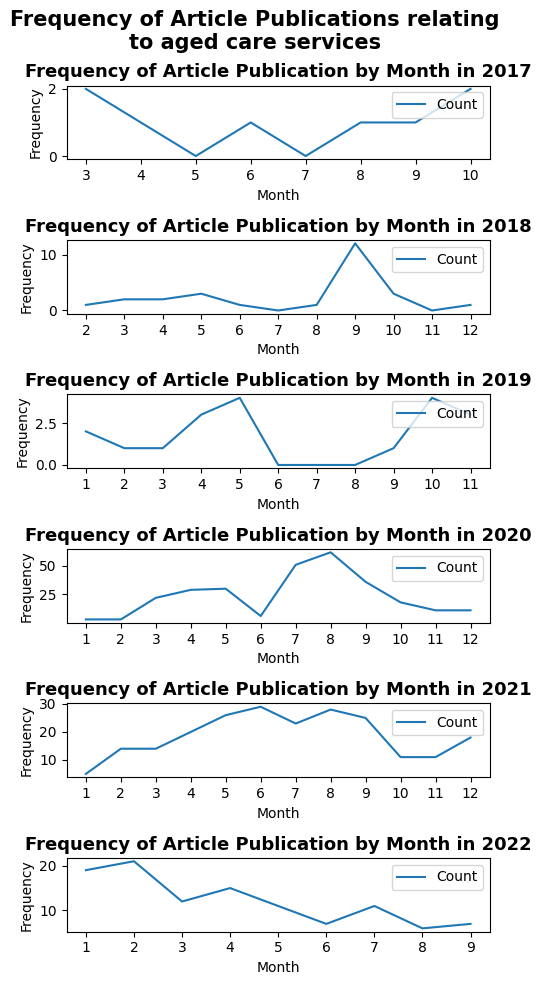

In [32]:
# Visualise the politicians
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6,  ncols=1)
fig.suptitle("Frequency of Article Publications relating\nto aged care services", fontweight="bold", size=15)
fig_list = [ax0, ax1, ax2, ax3, ax4, ax5]
year = final_scrape_df["Year"].min()

for count, df in enumerate(year_count_list):
    fig_list[count].set_title(f"Frequency of Article Publication by Month in {year}", fontweight="bold", size=13) 
    df.plot('Month', 'Count', ax=fig_list[count], label="Count", xticks=list(range(df["Month"].min(), df["Month"].max()+1)), xlabel="Month", ylabel="Frequency", figsize=(5,10))
    fig_list[count].legend(loc='upper right')
    year += 1
fig.tight_layout()


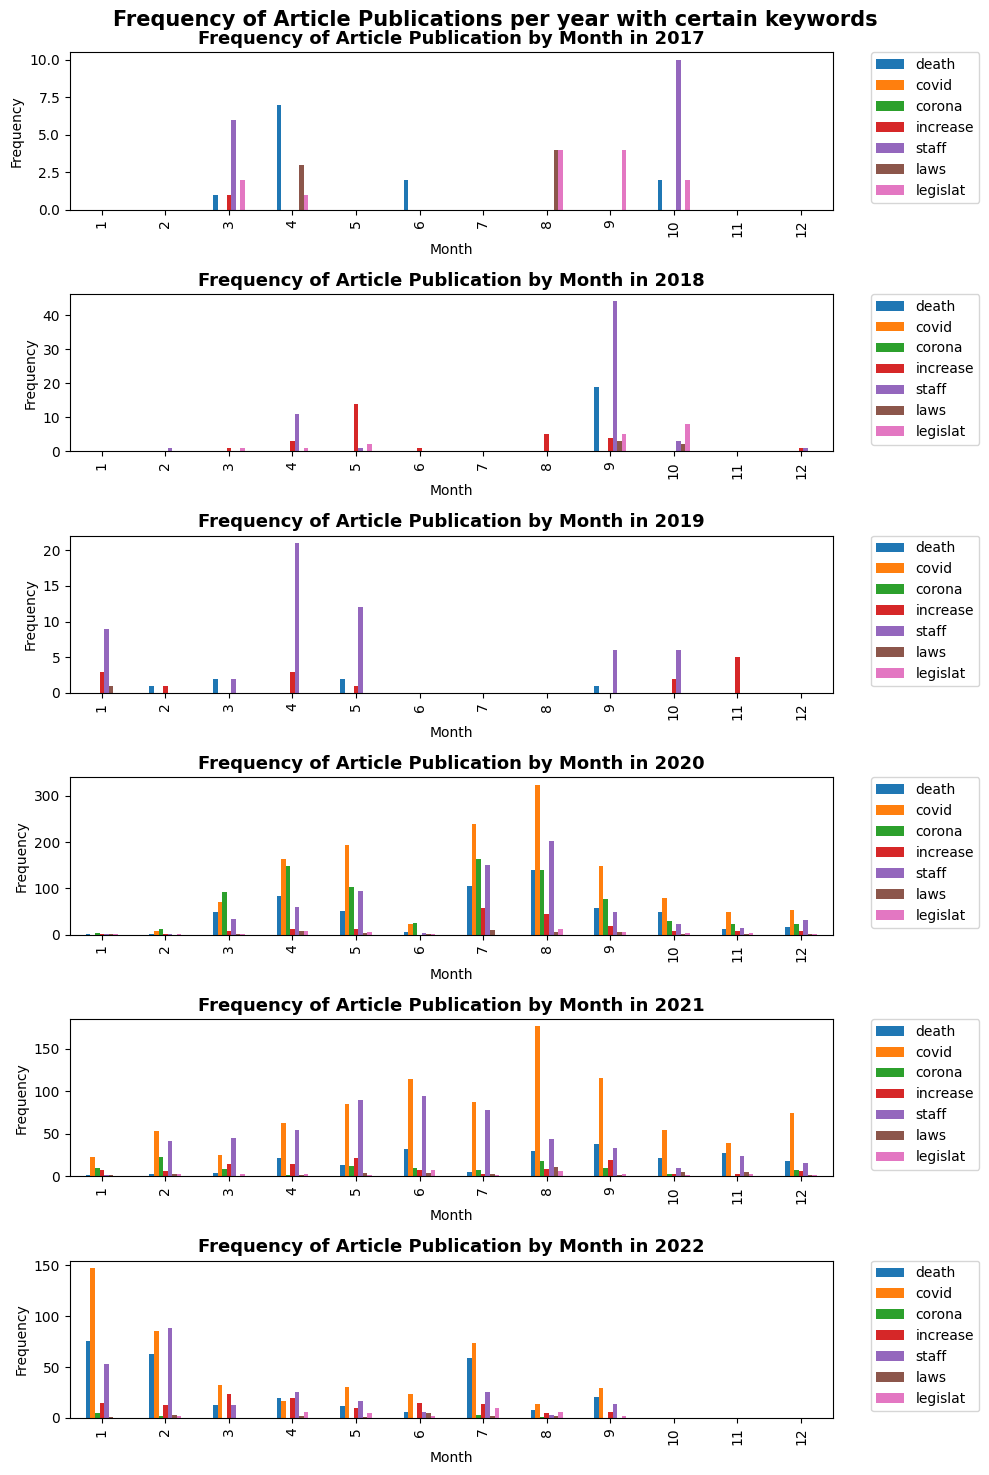

In [ ]:
# Visualise the politicians
fig, (ax0, ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=6,  ncols=1, figsize=(10,15))
fig.suptitle("Frequency of Article Publications per year with certain keywords", fontweight="bold", size=15)

ax0.set_title("Frequency of Article Publication by Month in 2017", fontweight="bold", size=13) 
ac_17_keywords_count_df.plot("Month", ["death", "covid", "corona", "increase", "staff", "laws", "legislat"], ax=ax0, kind="bar", xlabel="Month", ylabel="Frequency")
ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax1.set_title("Frequency of Article Publication by Month in 2018", fontweight="bold", size=13) 
ac_18_keywords_count_df.plot("Month", ["death", "covid", "corona", "increase", "staff", "laws", "legislat"], ax=ax1, kind="bar", xlabel="Month", ylabel="Frequency")
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax2.set_title("Frequency of Article Publication by Month in 2019", fontweight="bold", size=13)
ac_19_keywords_count_df.plot("Month", ["death", "covid", "corona", "increase", "staff", "laws", "legislat"], ax=ax2, kind="bar", xlabel="Month", ylabel="Frequency")
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax3.set_title("Frequency of Article Publication by Month in 2020", fontweight="bold", size=13)
ac_20_keywords_count_df.plot("Month", ["death", "covid", "corona", "increase", "staff", "laws", "legislat"], ax=ax3, kind="bar", xlabel="Month", ylabel="Frequency")
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax4.set_title("Frequency of Article Publication by Month in 2021", fontweight="bold", size=13)
ac_21_keywords_count_df.plot("Month", ["death", "covid", "corona", "increase", "staff", "laws", "legislat"], ax=ax4, kind="bar", xlabel="Month", ylabel="Frequency")
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

ax5.set_title("Frequency of Article Publication by Month in 2022", fontweight="bold", size=13)
ac_22_keywords_count_df.plot("Month", ["death", "covid", "corona", "increase", "staff", "laws", "legislat"], ax=ax5, kind="bar", xlabel="Month", ylabel="Frequency")
ax5.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
fig.tight_layout()

### Insight:

### [3] Analysis of Internal Data - Strengths and Weaknesses

*## Include a full QDAVI cycle for your analysis. You must do at least one complete analysis on internal data. Ensure that you document what you are doing and why you are doing it  ##*

In [ ]:
#
GEN_2021_data_df = pd.read_csv('ServicesPlaces_2020to2021_GENdata.csv')

GEN_2021_data_df

,Year,State,ACPR_code,ACPR_name,REMOTENESS,MMM_code,Program_type,Organisation_type,Service_size,Operational_places
0,2021,NSW,101,Central Coast,Major Cities of Australia,1,Home care,Private,-,-
1,2021,NSW,101,Central Coast,Major Cities of Australia,1,Home care,Not-for-profit,-,-
2,2021,NSW,101,Central Coast,Major Cities of Australia,1,Home care,Private,-,-
3,2021,NSW,101,Central Coast,Major Cities of Australia,1,Home care,Private,-,-
4,2021,NSW,101,Central Coast,Major Cities of Australia,1,Home care,Not-for-profit,-,-
...,...,...,...,...,...,...,...,...,...,...
5750,2021,ACT,801,ACT,Major Cities of Australia,1,Residential care,Not-for-profit,41�60,42
5751,2021,ACT,801,ACT,Major Cities of Australia,1,Residential care,Private,101+,130
5752,2021,ACT,801,ACT,Major Cities of Australia,1,Residential care,Not-for-profit,101+,144
5753,2021,ACT,801,ACT,Major Cities of Australia,1,Residential care,Not-for-profit,61�80,80


In [ ]:
GEN_2020_data_df = pd.read_csv('ServicesPlaces_2019to2020_GENdata.csv', encoding = 'cp1252')
GEN_2020_data_df

,Year,State,ACPR_code,ACPR_name,Remoteness,MMM_code,Program_type,Organisation_type,Service_size,Operational_places
0,2020,NT,Unknown,Unknown,Unknown,Unknown,National Aboriginal and Torres Strait Islander...,Not-for-profit,41–60,58
1,2020,NSW,115,Southern Highlands,Inner Regional Australia,5,Multi-purpose service,Government,21–40,29
2,2020,NSW,115,Southern Highlands,Major Cities of Australia,1,Residential care,Not-for-profit,101+,126
3,2020,NSW,115,Southern Highlands,Major Cities of Australia,1,Home care,Not-for-profit,-,-
4,2020,NSW,115,Southern Highlands,Major Cities of Australia,1,Residential care,Private,101+,110
...,...,...,...,...,...,...,...,...,...,...
5770,2020,ACT,801,ACT,Major Cities of Australia,1,Residential care,Not-for-profit,41–60,42
5771,2020,ACT,801,ACT,Major Cities of Australia,1,Home care,Not-for-profit,-,-
5772,2020,ACT,801,ACT,Major Cities of Australia,1,Home care,Private,-,-
5773,2020,ACT,801,ACT,Major Cities of Australia,1,Home care,Private,-,-


In [ ]:
GEN_2019_data_df = pd.read_csv('Services-and-places-in-aged-care-30-June-2019.csv', encoding = 'cp1252')
GEN_2019_data_df

,YEAR,STATE,ACPR_CODE,ACPR_NAME,REMOTENESS,PROGRAM_TYPE,ORGANISATION_TYPE,SERVICE_SIZE,OPERATIONAL_PLACES
0,2019,NSW,113,South East Sydney,Major Cities of Australia,Residential care,Not-for-profit,6,127
1,2019,NSW,114,South West Sydney,Inner Regional Australia,Residential care,Private,4,71
2,2019,NSW,109,New England,Outer Regional Australia,Residential care,Not-for-profit,3,57
3,2019,NSW,102,Central West,Outer Regional Australia,Residential care,Not-for-profit,2,37
4,2019,NSW,104,Hunter,Inner Regional Australia,Residential care,Not-for-profit,4,80
...,...,...,...,...,...,...,...,...,...
3252,2019,NSW,105,Illawarra,Inner Regional Australia,Residential care,Not-for-profit,4,64
3253,2019,NSW,114,South West Sydney,Major Cities of Australia,Residential care,Not-for-profit,6,124
3254,2019,NSW,110,Northern Sydney,Major Cities of Australia,Residential care,Not-for-profit,6,140
3255,2019,NSW,112,Riverina/Murray,Inner Regional Australia,Residential care,Not-for-profit,3,60


### [4] TOWS analysis - actionable recommendations

*## Using your analytics from [1] and [2], perform a TOWS analysis to identify actionable recommendations. You must complete at least one quadrant of TOWS. Elaborate on your recommendation/s linking to the analysis, and also ensuring a meaningful connection to the business concern. ##*

---

### [5] Peer review

#### Feedback received - reviewer 1: Firstname Lastname (Student number)

*## Write comments here ##*

#### Feedback received - reviewer 2: Firstname Lastname (Student number)

*## Write comments here ##*

#### Feedback received - reviewer 3: Firstname Lastname (Student number)

*## Write comments here ##*

#### Response to feedback received:

*## Write response here ##*

#### Feedback given to reviewer 1:

*## Write comments here ##*

#### Feedback given to reviewer 2:

*## Write comments here ##*

#### Feedback given to reviewer 3:

*## Write comments here ##*